In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from OneLoopLFVHD.LFVHDFeynG_mpmath2 import C0,C1,C2,B12_0,B1_1,B2_1,B1_0,B2_0,x0,x1,x2,x3,R0,y11np,y12np,f1

In [28]:
from OneLoopLFVHD.data import ml

In [29]:
from mpmath import *

In [30]:
mp.dps = 120; mp.pretty = True

In [31]:
from OneLoopLFVHD.data import ml

In [32]:
n = 500
mn = np.linspace(150,2000,n)
mW = mpf('80.379')
mh = mpf('125.1')
FactorRDC = 1.0/(1j*pi**2)
FactorRD = 1j/(16*pi**2)

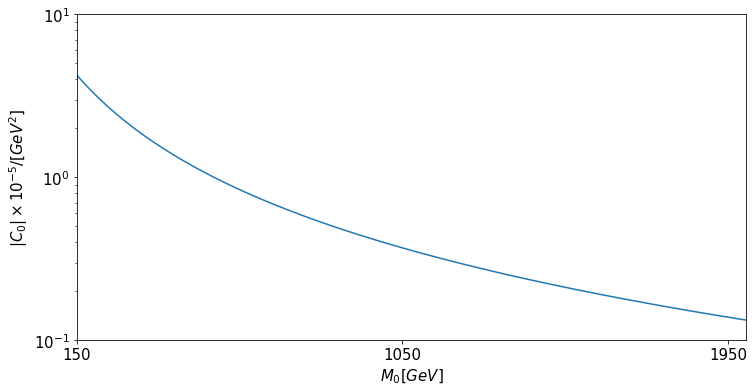

In [33]:
Y = np.array([abs(C0(mh,m,100,100))*1e5 for m in mn])
plt.figure(figsize=(12,6))
plt.semilogy(mn,Y)
plt.yticks([0.1,1,10],fontsize=15)
plt.xticks([150,1050,1950],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-5}/[GeV^2]$',fontsize=15)
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
plt.xlim(left=150,right=2000);

In [127]:
mW = 80.379
mh = 125.1
#print(C0(mh,mh,mW,mW),C0(mh,mW,mW,mW))
n = 500
#mn = np.linspace(50,1e8,n)
expmp = mp.linspace(-12,15,n)
mn = np.array([mpf('10.0')**k for k in expmp])
# mn = np.array([80.375,80.376,80.377,80.378,80.37899999,
# 80.380,80.381,80.382,80.383,80.384])
Y0 = np.array([abs(C0(mh,m,mW,mW))*1e5 for m in mn])
Y1 = np.array([abs(C1(mh,ml[2],m,mW,mW))*1e5 for m in mn])


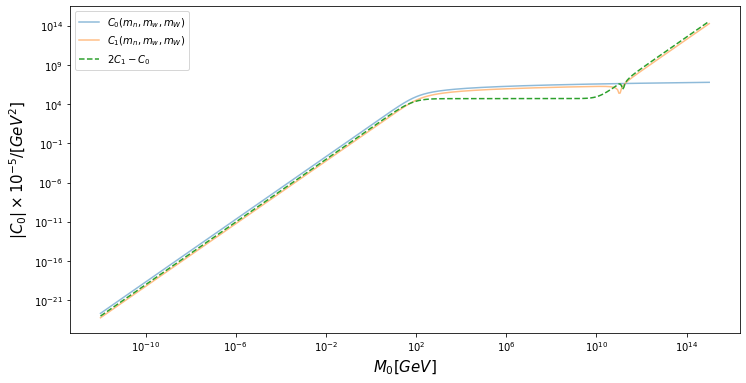

In [128]:
plt.figure(figsize=(12,6))
plt.loglog(mn,Y0*mn**2,label='$C_0(m_n,m_w,m_W)$',alpha=0.5)
plt.loglog(mn,Y1*mn**2,label='$C_1(m_n,m_w,m_W)$',alpha=0.5)
plt.loglog(mn,abs(2*Y1 - Y0)*mn**2,'--',label='$2 C_1 - C_0$')

#plt.yticks([0.1,1,10],fontsize=15);
#plt.xticks([80,150,1050,1950],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-5}/[GeV^2]$',fontsize=15)
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
#plt.xlim(left=50,right=150);
plt.legend()

In [129]:
Y0 = np.array([abs(C0(mh,mW,m,m)) for m in mn])
Y1 = np.array([abs(C1(mh,ml[2],mW,m,m)) for m in mn])

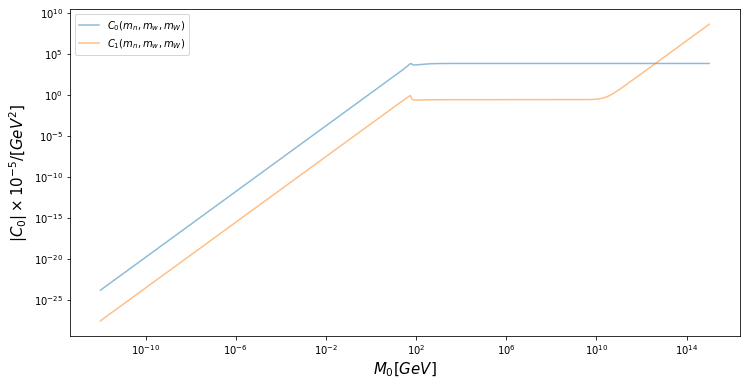

In [130]:
plt.figure(figsize=(12,6))
plt.loglog(mn,mW**2*Y0*mn**2,label='$C_0(m_n,m_w,m_W)$',alpha=0.5)
plt.loglog(mn,Y1*mn**2,label='$C_1(m_n,m_w,m_W)$',alpha=0.5)
#plt.loglog(mn,abs(2*Y1 - Y0)*mn**2,'--',label='$2 C_1 - C_0$')

#plt.yticks([0.1,1,10],fontsize=15);
#plt.xticks([80,150,1050,1950],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-5}/[GeV^2]$',fontsize=15)
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
#plt.xlim(left=50,right=150);
plt.legend()

In [131]:
Y0 = np.array([(mW**2-m**2)*C0(mh,m,mW,mW) for m in mn])
Y1 = np.array([C1(mh,ml[2],m,mW,mW) for m in mn])#mpf('1e-12')
Y2 = np.array([C2(mh,ml[3],m,mW,mW) for m in mn])#mpf('1e-12')

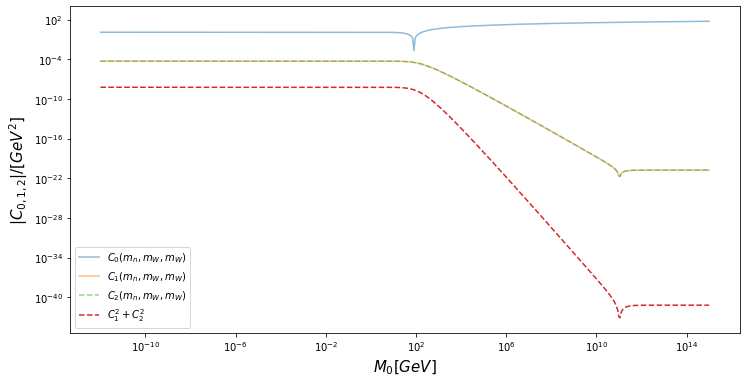

In [132]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(Y0),label='$C_0(m_n,m_W,m_W)$',alpha=0.5)
plt.loglog(mn,abs(Y1),label='$C_1(m_n,m_W,m_W)$',alpha=0.5)
plt.loglog(mn,abs(Y2),'--',label='$C_2(m_n,m_W,m_W)$',alpha=0.5)
plt.loglog(mn,abs(Y1**2 + Y2**2),'--',label='$C_1^2 + C_2^2$')
#plt.loglog(mn,abs(2*Y2 + Y0),'--',label='$2 C_2 + C_0$')


#plt.yticks([0.1,1,10],fontsize=15);
#plt.xticks([80,150,1050,1950],fontsize=15);
plt.ylabel(r'$|C_{0,1,2}|/[GeV^2]$',fontsize=15)
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
#plt.xlim(left=50,right=150);
plt.legend()

In [133]:
mW = 80.379
mh = 125.1
#print(C0(mh,mh,mW,mW),C0(mh,mW,mW,mW))
#n = 1000
#mn = mp.linspace(1,1e8,n)
#expmp = mp.linspace(1,8,n)
#mn = np.array([mpf('10.0')**k for k in expmp])
# mn = np.array([80.375,80.376,80.377,80.378,80.37899999,
# 80.380,80.381,80.382,80.383,80.384])

Y0 = np.array([C0(mh,mW,mpf('1e-12'),m) for m in mn])
Y1 = np.array([C1(mh,ml[2],mW,mpf('1e-12'),m) for m in mn])
Y2 = np.array([C2(mh,ml[3],mW,m,mpf('1e-12')) for m in mn])
YB01 = np.array([B1_0(ml[2],mW,mpf('1e-12')) for m in mn])
YB12 = np.array([B12_0(mh,mpf('1e-12'),m) for m in mn])
mWY0 = np.array([(m**2 - mW**2)*C0(mh,mW,mpf('1e-12'),m) for m in mn])


# Y0 = np.array([C0(mh,mW,m,m) for m in mn])
# Y1 = np.array([C1(mh,ml[2],mW,m,m) for m in mn])
# Y2 = np.array([C2(mh,ml[3],mW,m,m) for m in mn])
# YB01 = np.array([B1_0(ml[2],mW,m) for m in mn])
# YB12 = np.array([B12_0(mh,m,m) for m in mn])
# mWY0 = np.array([(m**2 - mW**2)*C0(mh,mW,m,m) for m in mn])


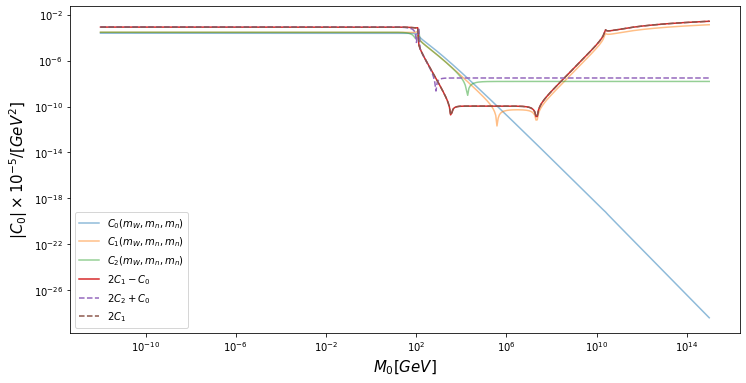

In [134]:

plt.figure(figsize=(12,6))
plt.loglog(mn,abs(Y0),label='$C_0(m_W,m_n,m_n)$',alpha=0.5)
plt.loglog(mn,abs(Y1),label='$C_1(m_W,m_n,m_n)$',alpha=0.5)
plt.loglog(mn,abs(Y2),label='$C_2(m_W,m_n,m_n)$',alpha=0.5)
plt.loglog(mn,abs(2*Y1 - Y0),'-',label='$2 C_1 - C_0$')
plt.loglog(mn,abs(2*Y2 + Y0),'--',label='$2 C_2 + C_0$')


plt.loglog(mn,abs((2/mh**2)*(YB01 -YB12 +  mWY0)-Y0),'--',label='$2 C_1$')



#plt.yticks([0.1,1,10],fontsize=15);
#plt.xticks([80,150,1050,1950],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-5}/[GeV^2]$',fontsize=15)
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
#plt.xlim(left=50,right=150);
plt.legend()

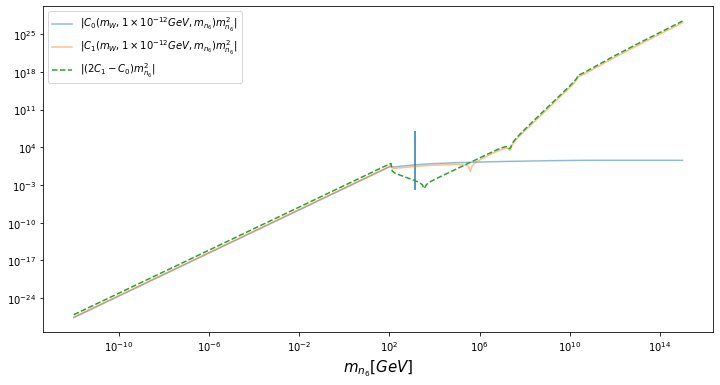

In [135]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(Y0*mn**2),label=r'$|C_0(m_W,1\times 10^{-12} GeV,m_{n_6})m_{n_6}^2|$',alpha=0.5)
plt.loglog(mn,abs(Y1*mn**2),label=r'$|C_1(m_W,1\times 10^{-12} GeV,m_{n_6})m_{n_6}^2|$',alpha=0.5)
plt.loglog(mn,abs(2*Y1 - Y0)*mn**2,'--',label='$|(2 C_1 - C_0)m_{n_6}^2|$')

#plt.yticks([0.1,1,10],fontsize=15);
#plt.xticks([80,150,1050,1950],fontsize=15);
#plt.ylabel(r'$|C_|$',fontsize=15)
plt.xlabel(r'$m_{n_6}[GeV]$',fontsize=15);
#plt.xlim(left=50,right=150);
plt.vlines((125.1**2/2 - 80.379**2),1e-4,1e7);
plt.legend()

In [139]:
MM1 = mpf('1e-12')
D21 = mn**2-MM1**2
MM2 = np.sqrt(D21 + MM1**2)

Y0 = np.array([C0(mh,mW,MM1,m) for m in MM2])
Y1 = np.array([C1(mh,ml[2],mW,MM1,m) for m in MM2])
Y2 = np.array([C2(mh,ml[3],mW,m,MM1) for m in MM2])
YB01 = np.array([B1_0(ml[2],mW,MM1) for m in MM2])
YB12 = np.array([B12_0(mh,MM1,m) for m in MM2])
mWY0 = np.array([(m**2 - mW**2)*C0(mh,mW,MM1,m) for m in MM2])

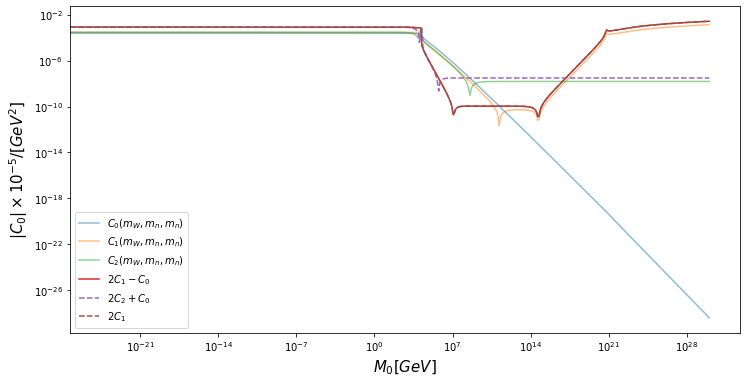

In [140]:
plt.figure(figsize=(12,6))
plt.loglog(D21,abs(Y0),label='$C_0(m_W,m_n,m_n)$',alpha=0.5)
plt.loglog(D21,abs(Y1),label='$C_1(m_W,m_n,m_n)$',alpha=0.5)
plt.loglog(D21,abs(Y2),label='$C_2(m_W,m_n,m_n)$',alpha=0.5)
plt.loglog(D21,abs(2*Y1 - Y0),'-',label='$2 C_1 - C_0$')
plt.loglog(D21,abs(2*Y2 + Y0),'--',label='$2 C_2 + C_0$')


plt.loglog(D21,abs((2/mh**2)*(YB01 -YB12 +  mWY0)-Y0),'--',label='$2 C_1$')



#plt.yticks([0.1,1,10],fontsize=15);
#plt.xticks([80,150,1050,1950],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-5}/[GeV^2]$',fontsize=15)
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
#plt.xlim(left=50,right=150);
plt.legend()

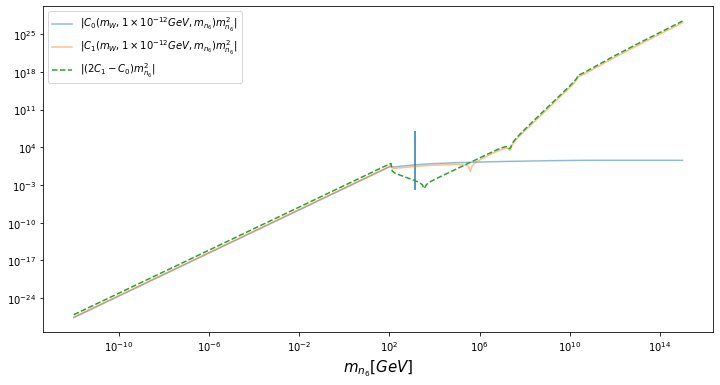

In [141]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(Y0*mn**2),label=r'$|C_0(m_W,1\times 10^{-12} GeV,m_{n_6})m_{n_6}^2|$',alpha=0.5)
plt.loglog(mn,abs(Y1*mn**2),label=r'$|C_1(m_W,1\times 10^{-12} GeV,m_{n_6})m_{n_6}^2|$',alpha=0.5)
plt.loglog(mn,abs(2*Y1 - Y0)*mn**2,'--',label='$|(2 C_1 - C_0)m_{n_6}^2|$')

#plt.yticks([0.1,1,10],fontsize=15);
#plt.xticks([80,150,1050,1950],fontsize=15);
#plt.ylabel(r'$|C_|$',fontsize=15)
plt.xlabel(r'$m_{n_6}[GeV]$',fontsize=15);
#plt.xlim(left=50,right=150);
plt.vlines((125.1**2/2 - 80.379**2),1e-4,1e7);
plt.legend()

In [46]:
#Y = np.array([abs(C0(mh,m,100,100))*1e5 for m in mn])
#mn = np.logspace(-1,15,n)

Y = np.array([(abs(C0(mh,mW,mpf('1e-12'),mpf(m)))) for m in mn])
Y1 = np.array([(abs(C1(mh,ml[1],mW,mpf(m),mpf('1e-12')))) for m in mn])
Y2 = np.array([(abs(C2(mh,ml[3],mW,mpf('1e-12'),mpf(m)))) for m in mn])
Ylog = np.array([abs(log(m**2)/m**2) for m in mn])

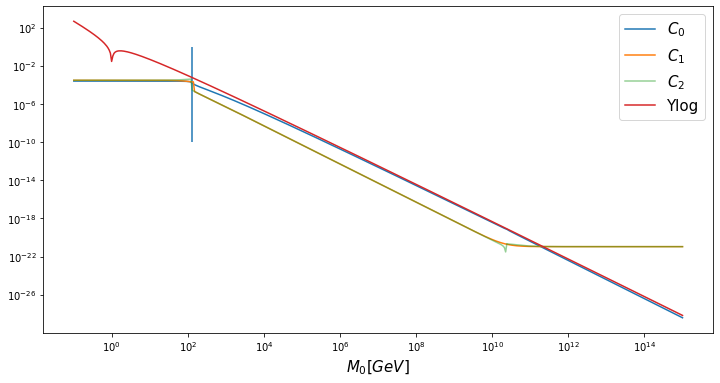

In [47]:
plt.figure(figsize=(12,6))
plt.loglog(mn,Y,label='$C_0$')
plt.loglog(mn,Y1,label='$C_1$')
plt.loglog(mn,Y2,label='$C_2$',alpha=0.5)
#plt.loglog(mn,abs(Y1 - Y2),label='$C_1 - C_2$',alpha=0.5)
plt.loglog(mn,Ylog,label='Ylog')
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
plt.vlines(125.1,1e-10,1)
plt.legend(fontsize=15)

In [48]:
mh = mpf('125.1')
YB10 = B1_0(ml[2],mW,mpf('1e-12'))/mh**2
YB20 = B2_0(ml[3],mW,mpf('1e-12'))/mh**2 

YB12_1 = np.array([B12_0(mh,mpf('1e-12'),m)/mh**2 for m in mn])
YB12_2 = np.array([B12_0(mh,m,mpf('1e-12'))/mh**2 for m in mn])


YC0 = np.array([C0(mh,mW,mpf('1e-12'),m) for m in mn])
YC0_1 = np.array([(m**2 - mW**2)*C0(mh,mW,mpf('1e-12'),m)/mh**2 for m in mn])
YC0_2 = np.array([(m**2 - mW**2)*C0(mh,mW,m,mpf('1e-12'))/mh**2 for m in mn])


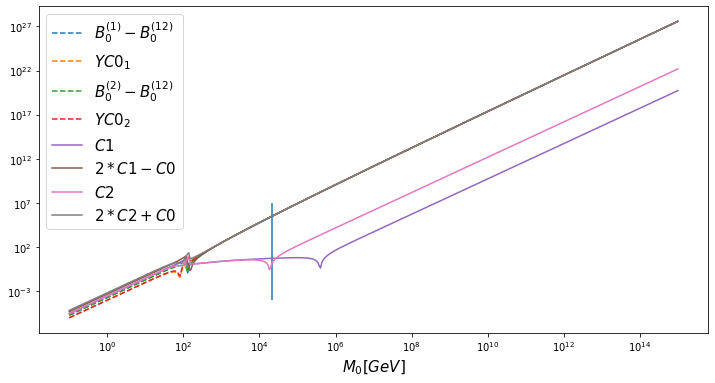

In [49]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(YB10 - YB12_1)*mn**2,'--',label='$B^{(1)}_0 - B^{(12)}_0$')
plt.loglog(mn,abs(YC0_1)*mn**2,'--',label='$YC0_1$')

plt.loglog(mn,abs(YB20 - YB12_2)*mn**2,'--',label='$B^{(2)}_0 - B^{(12)}_0$')
plt.loglog(mn,abs(YC0_2)*mn**2,'--',label='$YC0_2$')

plt.loglog(mn,abs((YB10 - YB12_1 + YC0_1))*mn**2,label='$C1$')
plt.loglog(mn,abs((2*(YB10 - YB12_1 + YC0_1)- YC0_1))*mn**2,label='$2*C1- C0$')

plt.loglog(mn,abs((YB20 - YB12_2 + YC0_2))*mn**2,label='$C2$')
plt.loglog(mn,abs((2*(YB20 - YB12_2 + YC0_2) + YC0_2))*mn**2,label='$2*C2+ C0$')
plt.vlines(3.5*10**4-(80.379**2 + 125.1**2/2),1e-4,1e7);#80.379**2 + 125.1**2/2
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
plt.legend(fontsize=15)

In [50]:
#mn = np.logspace(8,15,n)
YB20 = np.array([B2_0(ml[3],mW,m)/mh**2 for m in mn])
YB12 = np.array([B12_0(mh,mpf('1e-12'),m)/mh**2 for m in mn])
YC0 = np.array([(mpf('1e-12')**2 - mW**2)*C0(mh,mW,mpf('1e-12'),mpf(m))/mh**2 for m in mn])

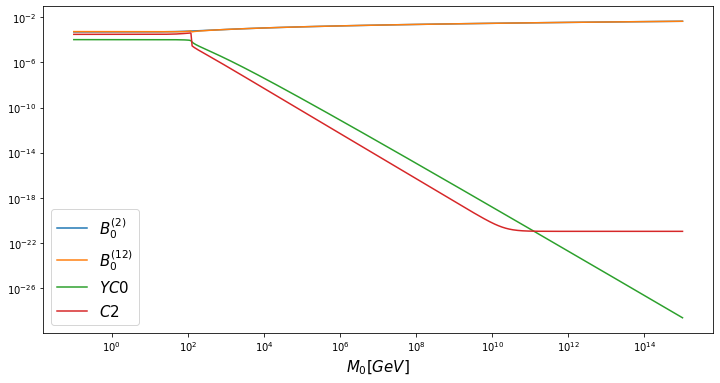

In [51]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(YB20),label='$B_0^{(2)}$')
plt.loglog(mn,abs(YB12),label='$B^{(12)}_0$')

plt.loglog(mn,abs(YC0),label='$YC0$')
plt.loglog(mn,abs((YB20 - YB12 + YC0)),label='$C2$')
#plt.loglog(mn,Y,label='$C0$')

#plt.loglog(mn,Ylog)
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
plt.legend(fontsize=15)

In [52]:
YY = np.array([abs(fadd(YB20[k],-YB12[k],  exact=True)) for k in range(len(mn))])

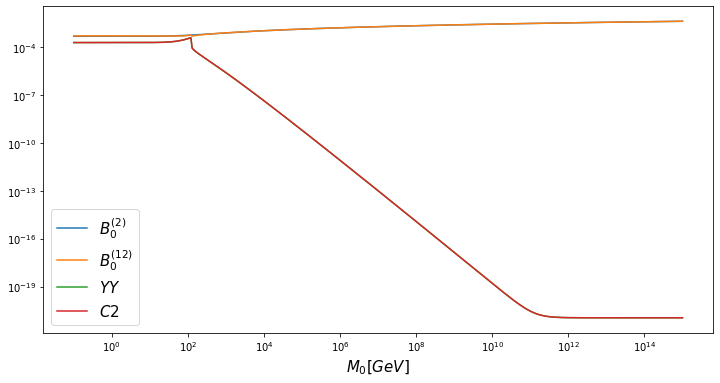

In [53]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(YB20),label='$B_0^{(2)}$')
plt.loglog(mn,abs(YB12),label='$B^{(12)}_0$')

plt.loglog(mn,YY,label='$YY$')
plt.loglog(mn,abs((YB20 - YB12)),label='$C2$')
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
plt.legend(fontsize=15)


In [54]:
M0 = mW; M1=mpf(1e-12); M2=mpf(1e15)
y0 = np.array([x0(mh,M0,m) for m in mn])
y3 = np.array([x3(M0,m) for m in mn])
y1 = np.array([x1(mh,M1,m) for m in mn])
y2 = np.array([x2(mh,M1,m) for m in mn])

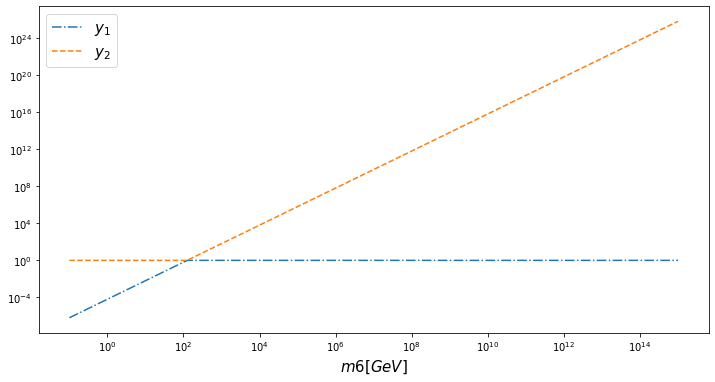

In [55]:
plt.figure(figsize=(12,6))
#plt.loglog(mn,y0,'--',label='$y_0$')
plt.loglog(mn,y1,'-.',label='$y_1$')
plt.loglog(mn,y2,'--',label='$y_2$')
#plt.loglog(mn,y3,'-.',label='$y_3$')
plt.xlabel(r'$m6[GeV]$',fontsize=15);
plt.legend(fontsize=15)

In [56]:
from OneLoopLFVHD.LFVHDFeynG_mpmath2 import y11np,y12np,y21np, y22np, f0np
import OneLoopLFVHD.LFVHDFeynGv3 as lfvhdFG
from sympy import symbols,sqrt,expand

In [57]:
mW = symbols(r'm_W')
ma = lfvhdFG.ma
M0 = lfvhdFG.M0
M1 = lfvhdFG.M1
M2 = lfvhdFG.M2

In [61]:
r0 = -(lfvhdFG.mj**2-M0**2)
r1 = M0**2 +2*M1*ma -lfvhdFG.mj**2
exp = lfvhdFG.y21#.subs(M2,M1)
exp.expand().simplify()#.subs(M0,0)


(-M_0**2 + M_2**2 + m_j**2 - sqrt(M_0**4 - 2*M_0**2*M_2**2 - 2*M_0**2*m_j**2 + M_2**4 - 4*M_2**2*m_a**2 + 2*M_2**2*m_j**2 + m_j**4))/(2*m_a**2)

In [4]:

num = lfvhdFG.y21.subs(M2,M1).args[2]#.subs(M1,r1).simplify()
args = num.args
display(args)
A = args[0] + args[1] + args[2]
B = -args[3]
B

(M_1**2,
 m_j**2,
 -M_0**2,
 -sqrt(-(-M_0**2 + M_1**2 + 2*M_1*m_a + m_j**2)*(M_0**2 - M_1**2 + 2*M_1*m_a - m_j**2)))

sqrt(-(-M_0**2 + M_1**2 + 2*M_1*m_a + m_j**2)*(M_0**2 - M_1**2 + 2*M_1*m_a - m_j**2))

In [5]:
display(A+B)
(exp*(A+B)).simplify()#/(A+B)

-M_0**2 + M_1**2 + m_j**2 + sqrt(-(-M_0**2 + M_1**2 + 2*M_1*m_a + m_j**2)*(M_0**2 - M_1**2 + 2*M_1*m_a - m_j**2))

2*M_1**2

In [31]:
l1 = abs(ml[3]**2+mn**2-mW**2)
l2 = abs(np.sqrt(-(-mW**2 + mn**2 + 2*mn*mh + ml[3]**2 )*(mW**2 - mn**2 + 2*mn*mh + ml[3]**2)))
plt.loglog(mn,l1,label='l1')
plt.loglog(mn,l2,label='l2')
#plt.ylim(1,1e8)
plt.legend()


TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable sqrt method

In [7]:
lfvhdFG.y22.subs(M2,M1).subs(M0,M1)#.subs(M0,mW)

(m_j**2 + sqrt(-(2*M_1*m_a - m_j**2)*(2*M_1*m_a + m_j**2)))/(2*m_a**2)

In [8]:
xk = lfvhdFG.xk
x1 = lambda M1,M2: xk(1,M1,M2)
x2 = lambda M1,M2: xk(2,M1,M2)
x0 = lfvhdFG.x0
x3 = lfvhdFG.x3

In [10]:
display(x0(M0,M2))
display(x3(M0,M2))

(-M_0**2 + M_2**2)/m_a**2

-M_0**2/(-M_0**2 + M_2**2)

In [35]:
display(x0(mW,0))
display(x3(mW,ma))

-m_W**2/m_a**2

-m_W**2/(-m_W**2 + m_a**2)

In [36]:
display(x0(mW,mW))
display(x3(mW,0))

0

1

In [37]:
display(x0(mW,0))
display(x3(mW,mW))

-m_W**2/m_a**2

zoo*m_W**2

In [60]:
mni = symbols('mn_i',positive=True)
lfvhdFG.PaVetoDivFin(lfvhdFG.C1(mni,mW,mW)).subs(lfvhdFG.cambios_aprox(mni,mW,mW)).subs(
    lfvhdFG.cambiosx(mW,mW,ma)
)#.subs({ma:mpf('125.1')})#.n()#.simplify()
#.subs({mW:80.379,ma:125.1}).n()

(-log(0.000154779985767364*m_a**2)/2 - log(-m_a**2/(0.5*m_i**2 - 0.5*mn_i**2 - 0.5*sqrt((-160.758*m_a - m_i**2 + mn_i**2 - 6460.783641)*(160.758*m_a - m_i**2 + mn_i**2 - 6460.783641)) + 3230.3918205) + 1) - log(-m_a**2/(0.5*m_i**2 - 0.5*mn_i**2 + 0.5*sqrt((-160.758*m_a - m_i**2 + mn_i**2 - 6460.783641)*(160.758*m_a - m_i**2 + mn_i**2 - 6460.783641)) + 3230.3918205) + 1) - 6.77350589607594 + (6460.783641 - mn_i**2)*(-polylog(2, (-1 + (6460.783641 - mn_i**2)/m_a**2)/((6460.783641 - mn_i**2)/m_a**2 - (m_a**2 - 160.758*m_a*sqrt(0.00622053023799749*m_a - 1)*sqrt(0.00622053023799749*m_a + 1))/(2*m_a**2))) - polylog(2, (-1 + (6460.783641 - mn_i**2)/m_a**2)/((6460.783641 - mn_i**2)/m_a**2 - (m_a**2 + 12.6790378183835*m_a*(12.6790378183835*sqrt(0.00622053023799749*m_a - 1))*sqrt(0.00622053023799749*m_a + 1))/(2*m_a**2))) + polylog(2, (-1 + (6460.783641 - mn_i**2)/m_a**2)/(mn_i**2/(6460.783641 - mn_i**2) + (6460.783641 - mn_i**2)/m_a**2)) + polylog(2, (6460.783641 - mn_i**2)/(m_a**2*((6460.78364

In [107]:
lfvhdFG.PaVe_aprox(lfvhdFG.C0(mW,0,mW)).subs(lfvhdFG.cambiosx(0,mW,ma)).simplify()
#_.subs({mW:80.379,ma:125.1}).n()

(-polylog(2, 2*m_a**2/(m_W**2 + m_a**2 - sqrt((m_W - m_a)**2*(m_W + m_a)**2))) - polylog(2, 2*m_a**2/(m_W**2 + m_a**2 + sqrt((m_W - m_a)**2*(m_W + m_a)**2))) + pi**2/6)/m_a**2

In [109]:
lfvhdFG.PaVe_aprox(lfvhdFG.C0(mW,mW,0)).subs(lfvhdFG.cambiosx(mW,0,ma)).simplify()
#_.subs({mW:80.379,ma:125.1}).n()

(polylog(2, 2*m_W**2/(m_W**2 + m_a**2 - sqrt((m_W - m_a)**2*(m_W + m_a)**2))) + polylog(2, 2*m_W**2/(m_W**2 + m_a**2 + sqrt((m_W - m_a)**2*(m_W + m_a)**2))) - polylog(2, 2*(m_W**2 + m_a**2)/(m_W**2 + m_a**2 - sqrt((m_W - m_a)**2*(m_W + m_a)**2))) - polylog(2, 2*(m_W**2 + m_a**2)/(m_W**2 + m_a**2 + sqrt((m_W - m_a)**2*(m_W + m_a)**2))) + pi**2/6)/m_a**2

In [30]:
mn = np.logspace(-1,15,n)
M0 = 125.1; M1=mpf(1e-12); M2=mpf(1e15)
y11 = np.array([y11np(ml[2],M0,mpf('1e-12')) for m in mn])
y12 = np.array([y12np(ml[2],M0,mpf('1e-12')) for m in mn])
y21 = np.array([y21np(ml[3],M0,m) for m in mn])
y22 = np.array([y22np(ml[3],M0,m) for m in mn])

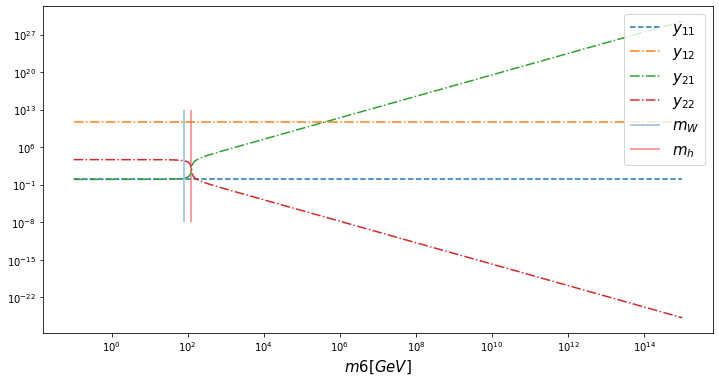

In [31]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(y11),'--',label='$y_{11}$')
plt.loglog(mn,abs(y12),'-.',label='$y_{12}$')
plt.loglog(mn,abs(y21),'-.',label='$y_{21}$')
plt.loglog(mn,abs(y22),'-.',label='$y_{22}$')
plt.vlines(80.379,1e-8,1e13,label='$m_W$',alpha=0.5)
plt.vlines(125.1,1e-8,1e13,'r',label='$m_h$',alpha=0.5)

plt.xlabel(r'$m6[GeV]$',fontsize=15);
plt.legend(fontsize=15)

In [21]:
f0npy11 = np.array([f0np(y) for y in y11])
f0npy12 = np.array([f0np(y) for y in y12])
f0npy21 = np.array([f0np(y) for y in y21])
f0npy22 = np.array([f0np(y) for y in y22])
#logm12 = np.array([log(m**2)for m in mn])

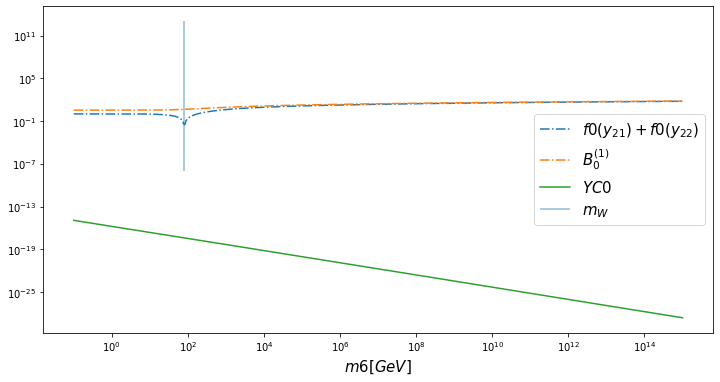

In [23]:
plt.figure(figsize=(12,6))
#plt.loglog(mn,abs(f0npy11),'--',label='$f0(y_{11})$')
#plt.loglog(mn,abs(f0npy12),'-.',label='$f0(y_{12})$')
#plt.loglog(mn,abs(logm12),'-.',label='$log(m^2)$')
#plt.loglog(mn,abs(f0npy11 + f0npy12),'-.',label='$f0(y_{11}) + f0(y_{12})$')
#plt.loglog(mn,abs(-log(mW) -f0npy11 - f0npy12),'-.',label='$B_0^{(1)}$')

plt.loglog(mn,abs(f0npy21 + f0npy22),'-.',label='$f0(y_{21}) + f0(y_{22})$')
plt.loglog(mn,abs(-log(mW) -f0npy21 - f0npy22),'-.',label='$B_0^{(1)}$')

plt.loglog(mn,abs(YC0),label='$YC0$')

plt.vlines(80.379,1e-8,1e13,label='$m_W$',alpha=0.5)


plt.xlabel(r'$m6[GeV]$',fontsize=15);
plt.legend(fontsize=15)

In [24]:
A21 = np.array([y*log(-y) for y in y21])
A22 = np.array([y*log(-y) for y in y22])

B21 = np.array([y*log(1-y) for y in y21])
B22 = np.array([y*log(1-y) for y in y22])

C21 = np.array([log(1-1/y) for y in y21])
C22 = np.array([log(1-1/y) for y in y22])

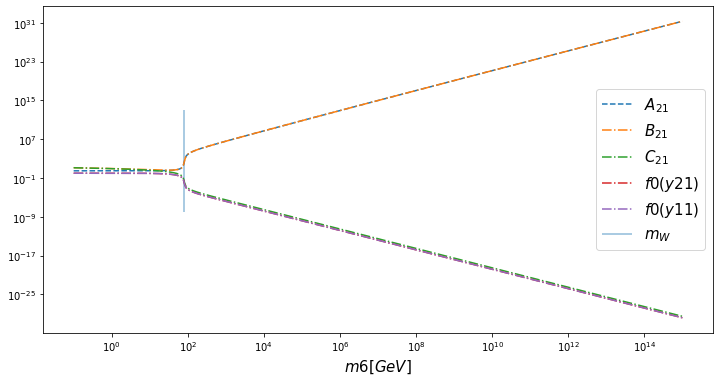

In [25]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(A21),'--',label='$A_{21}$')
plt.loglog(mn,abs(B21),'-.',label='$B_{21}$')
plt.loglog(mn,abs(C21),'-.',label='$C_{21}$')
plt.loglog(mn,abs(f0npy21),'-.',label='$f0(y21)$')
plt.loglog(mn,abs(A21 -B21 + C21 - 1.0),'-.',label='$f0(y11)$')
plt.vlines(80.379,1e-8,1e13,label='$m_W$',alpha=0.5)


plt.xlabel(r'$m6[GeV]$',fontsize=15);
plt.legend(fontsize=15)

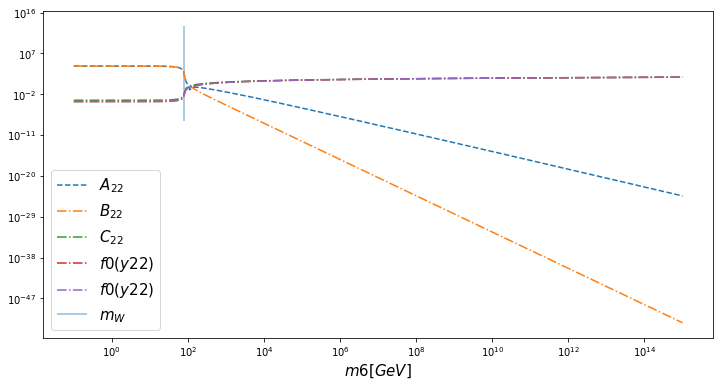

In [26]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(A22),'--',label='$A_{22}$')
plt.loglog(mn,abs(B22),'-.',label='$B_{22}$')
plt.loglog(mn,abs(C22),'-.',label='$C_{22}$')
plt.loglog(mn,abs(f0npy22),'-.',label='$f0(y22)$')
plt.loglog(mn,abs(A22 -B22 + C22 - 1.0),'-.',label='$f0(y22)$')


plt.vlines(80.379,1e-8,1e13,label='$m_W$',alpha=0.5)
plt.xlabel(r'$m6[GeV]$',fontsize=15);
plt.legend(fontsize=15)

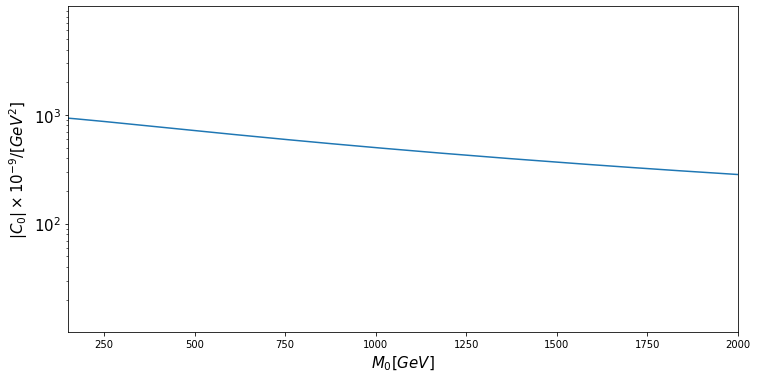

In [37]:
Y = np.array([np.abs(C0(mh,m,1000,1000)*1e9) for m in mn])
plt.figure(figsize=(12,6))
plt.semilogy(mn,Y)
plt.yticks([100,1000],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-9}/[GeV^2]$',fontsize=15);
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
plt.xlim(left=150,right=2000);
plt.ylim(10,10000);

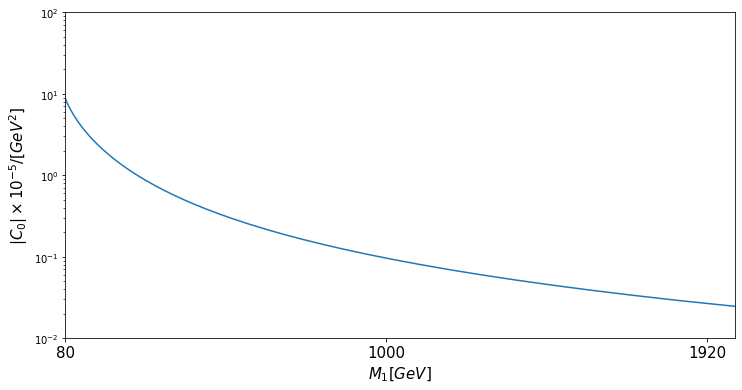

In [38]:
Y = np.array([np.abs(C0(mh,100,m,m))*1e5 for m in mn])
plt.figure(figsize=(12,6))
plt.semilogy(mn,Y)
#plt.yticks([0.1,1,10],fontsize=15)
plt.xticks([80,1000,1920],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-5}/[GeV^2]$',fontsize=15)
plt.xlabel(r'$M_1[GeV]$',fontsize=15)
plt.xlim(left=80,right=2000);
plt.ylim(1e-2,100);

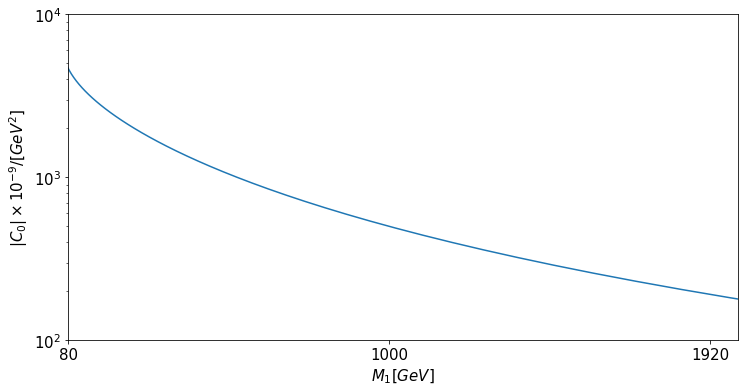

In [39]:
Y = np.array([np.abs(C0(mh,1000,m,m))*1e9for m in mn])
plt.figure(figsize=(12,6))
plt.semilogy(mn,Y)
plt.yticks([100,1000,10000],fontsize=15)
plt.xticks([80,1000,1920],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-9}/[GeV^2]$',fontsize=15)
plt.xlabel(r'$M_1[GeV]$',fontsize=15)
plt.xlim(left=80,right=2000);
plt.ylim(100,10000);

In [70]:
mn = np.linspace(0,2000,n)
Y = np.array([np.abs(C0(mh,1e-10,mpf(m),mpf(m)))*1e9 for m in mn])

#Ydiff = np.array([diff(lambda x: C0(mh,1e-10,x,x),m)*1e9 for m in mn])

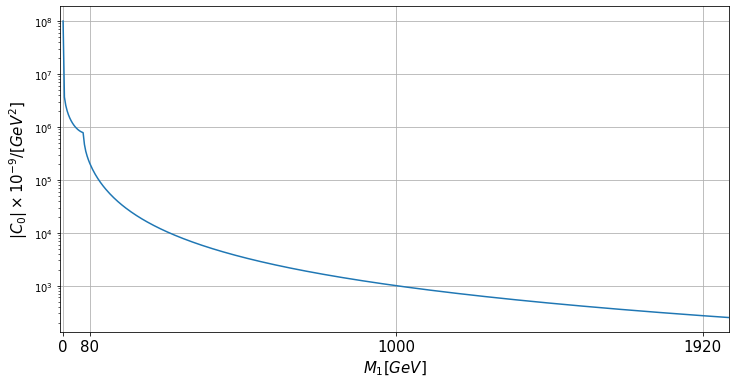

In [62]:
plt.figure(figsize=(12,6))
plt.semilogy(mn,Y)
#plt.semilogy(mn,abs(Ydiff))
plt.xticks([0,80,1000,1920],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-9}/[GeV^2]$',fontsize=15);
plt.xlabel(r'$M_1[GeV]$',fontsize=15);
plt.xlim(-10,2000)
plt.grid(True)
#plt.vlines(80.379,1,1e7,linestyles='--')

In [35]:
m = 80
abs(C0(mh,1e-10,mpf(m),mpf(m)))

0.0002059570060410428228010672528762060994241339272552351197103749008614002536268532783474311000706615086

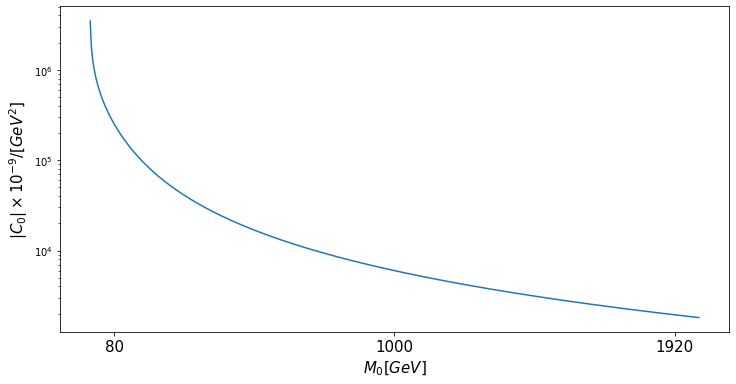

In [36]:
plt.figure(figsize=(12,6))
Y = np.array([np.abs(C0(mh,m,1e-10,1e-10))*1e9 for m in mn])
plt.semilogy(mn,Y)
plt.xticks([80,1000,1920],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-9}/[GeV^2]$',fontsize=15);
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
#plt.xlim(left=80,right=2000);